# Guide to the notebook

## Interface

- There is a console on the left to create cells temporarily for testing purpose. You can toggle it by click the **Console** button on the top toolbar.
- Click a cell and press **Ctrl-Enter** or **Cmd-Ender** will exectute the commands in cell
- If you get an unexpected result try to rerun the cell

# Practical - Genome-Wide Association study (GWAS)

This exercise is about Genome-Wide Association Studies (GWAS): how to perform one and some pitfalls to look out for. 

It will be conducted from the command line (bash terminal) using the program PLINK and using R for visualization. 

For a detailed description of the Plink program click [here (original program)](http://zzz.bwh.harvard.edu/plink/) and [here (updated version of the program)](https://www.cog-genomics.org/plink/1.9/).

The exercise will be carried out at the linux server via this notebook. This notebook consist of blocks that are either text (like this block), a bash terminal in linux with some code (says "Bash" in the upper right corner) or an R terminal with some code (says R in the upper right corner).
To excecute the Bash and R code click on the relevant block with your mouse and then type Ctrl-Enter (hold down control bottom and then press enter). NB if you are a mac user you should instead type cmd-Enter. 

You can change the code and then run again with Crtl-Enter (Cmd-Enter on mac computers). 




## Preparation - copy the data to your folder


First, list the content of your home folder. You do this in Bash by running the commands below. Click the box and run the commmand (Crtl-Enter on windows/linuz, Cmd-Enter on Mac). First run migt give you an error; just ignore that and rerun:

In [ ]:
# this is a comment. Comments starts with a # and the text is not run as code.

# command to go to your home
cd ~/

# command to view all the files and folders in your home
ls

'  01.phasing.SHAPEIT.ipynb'         plink.assoc.logistic
 02.Minimac4_Imputaion.ipynb         plink.assoc.logistic.adjusted
 03.QUILT_Imputation.ipynb           plink.cluster1
 03_QUILT_Imputation_new.ipynb       plink.cluster2
 04.GWASintro_2023_SAIGE.ipynb       plink.cluster3
 assoc2.assoc.logistic               plink.genome
 assoc2.irem                         plink.hh
 assoc2.log                          plink.irem
 data                                plink.log
 Disease29_b129.txt                  plink.mds
 GWASex.tar.gz                       QUILT
 GWASintro_2023.ipynb                R
 imputed.sav                         SAIGE
 Minimac4                            SAIGE_output
 new.01.phasing.SHAPEIT_v2.ipynb     scripts
 new.02.Minimac4_Imputaion.ipynb     shapeit.v2
 new.03.QUILT_Imputation_new.ipynb   shapeitV2
 new.04.GWASintro_2023_SAIGE.ipynb   software
 new_exercise                        Untitled1.ipynb
 newPlotPlink.R


Now download a compressed version of the data that we will be analyzing today. You can do this with the following commands

In [ ]:
# copy data to your folder
cp /course/novo23/gwas/GWASex.tar.gz .
cp /course/novo23/scripts/newPlotPlink.R .
# view all files in folder
ls

'  01.phasing.SHAPEIT.ipynb'         plink.assoc.logistic
 02.Minimac4_Imputaion.ipynb         plink.assoc.logistic.adjusted
 03.QUILT_Imputation.ipynb           plink.cluster1
 03_QUILT_Imputation_new.ipynb       plink.cluster2
 04.GWASintro_2023_SAIGE.ipynb       plink.cluster3
 assoc2.assoc.logistic               plink.genome
 assoc2.irem                         plink.hh
 assoc2.log                          plink.irem
 data                                plink.log
 Disease29_b129.txt                  plink.mds
 GWASex.tar.gz                       QUILT
 GWASintro_2023.ipynb                R
 imputed.sav                         SAIGE
 Minimac4                            SAIGE_output
 new.01.phasing.SHAPEIT_v2.ipynb     scripts
 new.02.Minimac4_Imputaion.ipynb     shapeit.v2
 new.03.QUILT_Imputation_new.ipynb   shapeitV2
 new.04.GWASintro_2023_SAIGE.ipynb   software
 new_exercise                        Untitled1.ipynb
 newPlotPlink.R


Next uncompress the files and list the content of the folder to see what files appeared:

In [ ]:
# uncompress the files
tar -xf GWASex.tar.gz

# view all files in folder
ls

'  01.phasing.SHAPEIT.ipynb'         plink.assoc.logistic
 02.Minimac4_Imputaion.ipynb         plink.assoc.logistic.adjusted
 03.QUILT_Imputation.ipynb           plink.cluster1
 03_QUILT_Imputation_new.ipynb       plink.cluster2
 04.GWASintro_2023_SAIGE.ipynb       plink.cluster3
 assoc2.assoc.logistic               plink.genome
 assoc2.irem                         plink.hh
 assoc2.log                          plink.irem
 data                                plink.log
 Disease29_b129.txt                  plink.mds
 GWASex.tar.gz                       QUILT
 GWASintro_2023.ipynb                R
 imputed.sav                         SAIGE
 Minimac4                            SAIGE_output
 new.01.phasing.SHAPEIT_v2.ipynb     scripts
 new.02.Minimac4_Imputaion.ipynb     shapeit.v2
 new.03.QUILT_Imputation_new.ipynb   shapeitV2
 new.04.GWASintro_2023_SAIGE.ipynb   software
 new_exercise                        Untitled1.ipynb
 newPlotPlink.R


Your folder should now contain a subfolder called data, containing the all files you will use in this exercise.

Some of the files are data files, but note that the folder also contain a file called plink.plot.R, which contain R code for plotting your results.

List the content of the data folder

In [ ]:
ls data/

gwa.bed  gwa.bim  gwa.fam  pheno3.txt  pheno.txt  plink.plot.R


## Exercise A: running your first GWAS

Briefly, the GWAS data consist of SNP genotyping data from 10,000 European individuals with information about their standing height (in meters).

To make sure the GWAS analyses will run fast the main data file (European_1w.bed) is in a binary format, which is not very reader friendly. 

However, PLINK (the program we will use to run the analyses) will print summary statistics about the data (number of SNPs, number of individuals etc) to the screen when you run an analysis.

Also, there are two additional data files, European_1w.bim and European_1w.fam, which are not in binary format and which contains information about the SNPs in the data and the individuals in the data, respectively.

(You can read more about the data format in the manuals linked to above - but for now this is all you need to know).

Let's look inside the .fam file, which contains information about the individuals. The head and tail commands shows the first and last 10 lines of the file. Try to run them:

In [ ]:
#head prints the 10 lines
head data/input/European_1w.fam
#tail prints the last 10 lines
tail data/input/European_1w.fam

case1 1 0 0 1 2
case2 1 0 0 1 2
case3 1 0 0 2 2
case4 1 0 0 2 2
case5 1 0 0 2 2
case6 1 0 0 1 2
case7 1 0 0 2 2
case8 1 0 0 2 2
case9 1 0 0 2 2
case10 1 0 0 2 2
control191 1 0 0 2 1
control192 1 0 0 2 1
control193 1 0 0 2 1
control194 1 0 0 2 1
control195 1 0 0 2 1
control196 1 0 0 2 1
control197 1 0 0 2 1
control198 1 0 0 2 1
control199 1 0 0 2 1
control200 1 0 0 2 1


Let's try to perform a GWAS of our data, i.e. test each SNP for association with the standing height.

And let's try to do it using linear regression for standing height data

The PLINK option "--bfile data/input/European_1w" will specify that the data PLINK should analyse are the files in folder called "data/input" with the prefix "European_1w".

"—linear" specifies that we want to perform GWAS using linear regression

"—adjust" tells PLINK to output a file that includes p-values that are adjusted for multiple testing using Bonferroni correction as well as other fancier methods.

"—autosome" only use autosomes and not X,Y,MT


Now perform the logistic regression on all the SNPs int the dataset using these options in PLINK by typing:

In [ ]:
plink \
  --bfile data/input/European_1w \
  --linear \
  --adjust \
  --autosome

PLINK v1.90b6 64-bit (26 May 2018)             www.cog-genomics.org/plink/1.9/
(C) 2005-2018 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --adjust
  --autosome
  --bfile data/gwa
  --logistic

386831 MB RAM detected; reserving 193415 MB for main workspace.
488756 out of 499264 variants loaded from .bim file.
356 people (145 males, 211 females) loaded from .fam.
356 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 356 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.964498.
488756 variants and 356 people pass filters and QC.
Among remaining phenotypes, 156 are cases and 200 are controls.
Writing logistic model association res

Take a look at the text PLINK prints to your screen. Specifically, note the

 - number of SNPs

 - number of individuals

 - number of cases and controls
 


Next, plot the results of the GWAS using the following command run in R



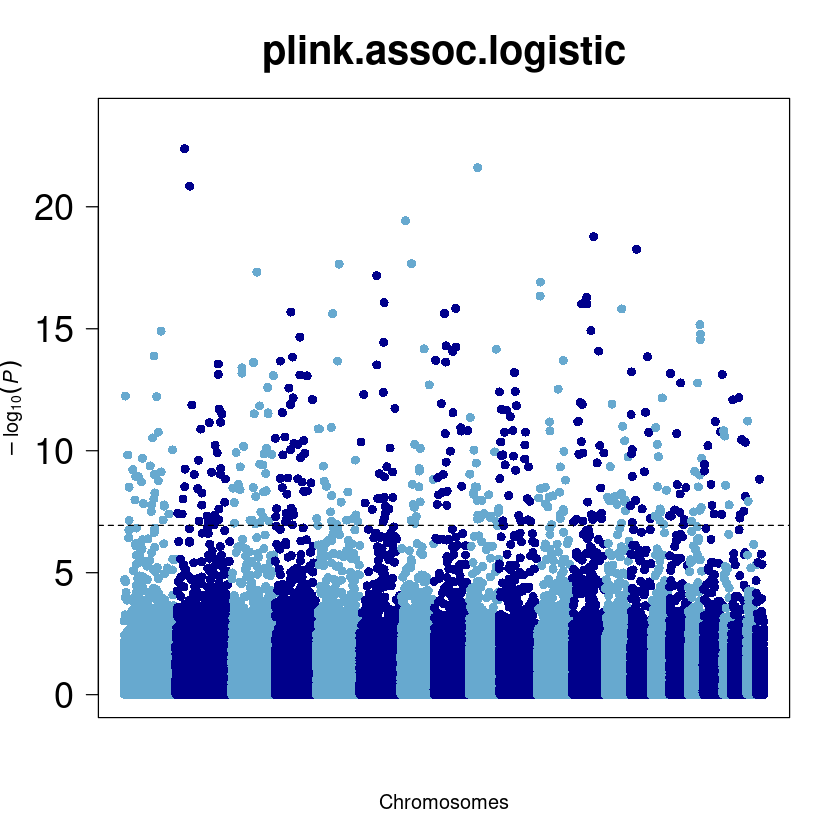

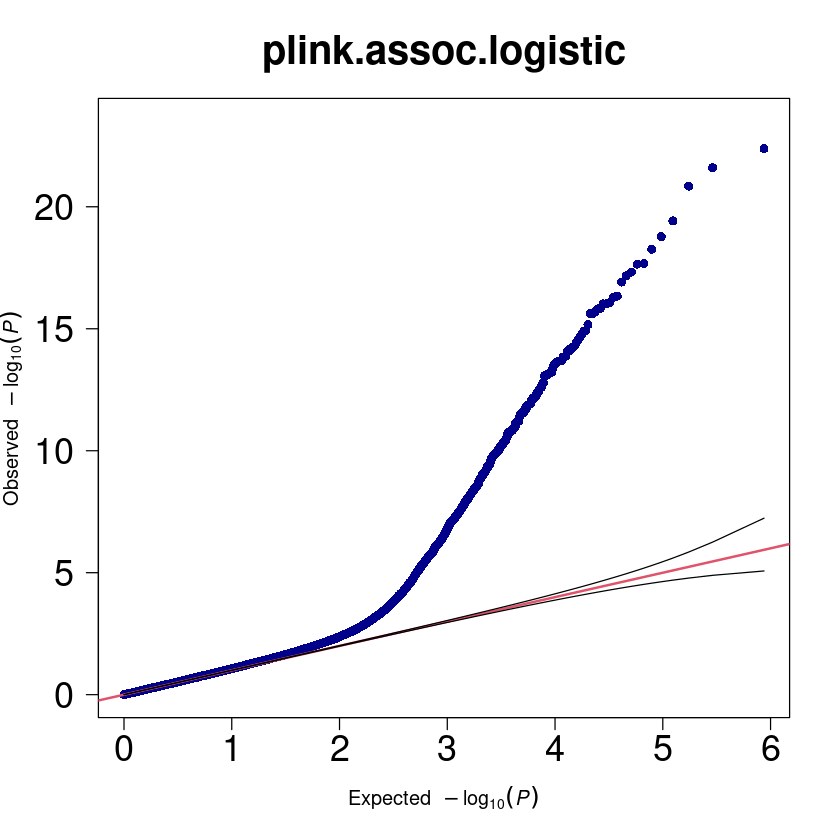

In [ ]:
# source R function for plotting
source("/course/novo23/scripts/newPlotPlink.R")

# plot the results (plink.assoc.logistic is the output file from plink)
plotPlink("~/plink.assoc.logistic")

This should give you several plots. If nothing shows up, rerun the cell.

For now just look at the Manhattan plot (the first plot). A bonferroni corrected p-value threshold based on an initial p-value threshold of 0.05 is shown as a dotted line on the plot. Explain how this threshold was reached and calculate the exact threshold using your knowledge of how many SNPs you have in your dataset (NB if you want to calculate log10 in R you can use the function log10).

You can perform calculations by changing the R code below (and running it by typing Ctrl-enter as before).

In [ ]:
## change the code for your calculations (random numbers showed)

4.5 / 1200000

[1] 3.75e-06


- Using this threshold, does any of the SNPs in your dataset seem to be associated with the disease?

- Do your results seem plausible? Why/why not?


## Exercise B: checking if it went OK using QQ-plot

Now look at the QQ-plot that you already generated (second plot above). Here the red line is the x=y line and the thin curves are a confidence band.

- What does this plot suggest and why?





## Exercise C: QC your data

As you can see, a lot can go wrong if you do not check the quality of your data before running your GWAS! So if you want meaningful/useful output you always have to run a lot of quality checks (QC) before running the association tests. Will will try to go through some useful QC steps now.

One potential problem in association studies is spurious relatedness, where some of the individuals in the sample are closely related. Closely related individuals can be inferred with PLINK using the following command, which only uses autosomal SNPs with a minor allele frequency > 5%:



In [ ]:
plink  --bfile data/gwa --genome --autosome --maf 0.05

PLINK v1.90b6 64-bit (26 May 2018)             www.cog-genomics.org/plink/1.9/
(C) 2005-2018 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --autosome
  --bfile data/gwa
  --genome
  --maf 0.05

386831 MB RAM detected; reserving 193415 MB for main workspace.
488756 out of 499264 variants loaded from .bim file.
356 people (145 males, 211 females) loaded from .fam.
356 phenotype values loaded from .fam.
Using up to 87 threads (change this with --threads).
Before main variant filters, 356 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.964498.
111253 variants removed due to minor allele threshold(s)
(--maf/--max-maf/--mac/--max-mac).
377503 variants and 356 people pass filters and QC.
Among remaini

The results can be summarised in a plot with the following R code and gives the names of potential related pairs: 

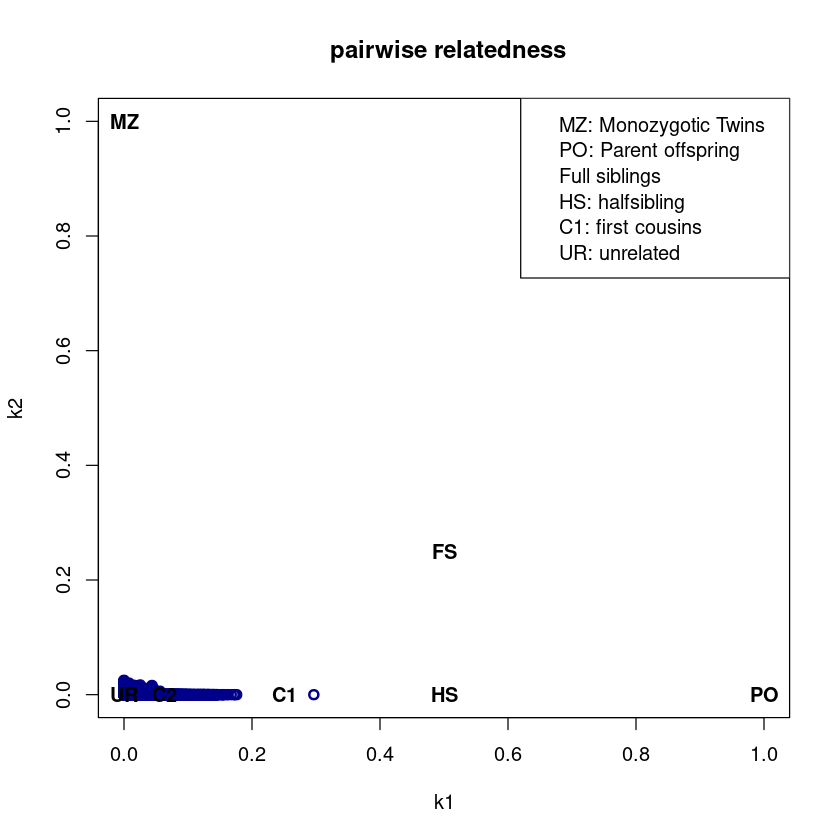

In [ ]:
# source R function for plotting
source("/course/novo23/scripts/newPlotPlink.R")

# plot the results (plink.genome is the output file from plink)
plotPlink("~/plink.genome")


The figure shows estimates of the relatedness for all pairs of individuals.

For each pair k1 is the proportion of the genome where the pair shares 1 of their alleles identical-by-descent (IBD) and k2 is the proportion of the genome where the pair shares both their alleles IBD.

- The expected (k1,k2) values for simple relationships are shown in the figure. Are any of the individuals in your dataset closely related?

- What assumption in association studies is violated when individuals are related? 

- And last but not least: how would you recognize if the same person is included twice? (this actually happens often!)


We usually only remove 1. or 2. degree relatives (MZ,PO,FS,HS) from the analysis or we use a mixed model to take the relatedness into account. 

Principal component analysis (PCA) and a very similar methods called multidimensional scaling is also often used to reveal problems in the data.

Such analyses can be used to project all the genotype information (e.g. 500,000 marker sites) down to a low number of dimensions e.g. two.

Multidimensional scaling based on your data can be performed with PLINK as follows (the option --mind is used to remove the few individuals which have more than 20% missingness):

In [ ]:
#defailt plink --bfile data/gwa --cluster --mds-plot 2 --mind 0.2 
plink --bfile data/gwa --cluster --mds-plot 2 --mind 0.2 

PLINK v1.90b6 64-bit (26 May 2018)             www.cog-genomics.org/plink/1.9/
(C) 2005-2018 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --bfile data/gwa
  --cluster
  --mds-plot 2
  --mind 0.2

386831 MB RAM detected; reserving 193415 MB for main workspace.
499264 variants loaded from .bim file.
356 people (145 males, 211 females) loaded from .fam.
356 phenotype values loaded from .fam.
15 people removed due to missing genotype data (--mind).
IDs written to plink.irem .
Using up to 87 threads (change this with --threads).
Before main variant filters, 341 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
treat these as missing.
Total genotyping rate in remaining samples is 0.985888.
499264 variants and 341 people pass fi

Try to plot the results in R:

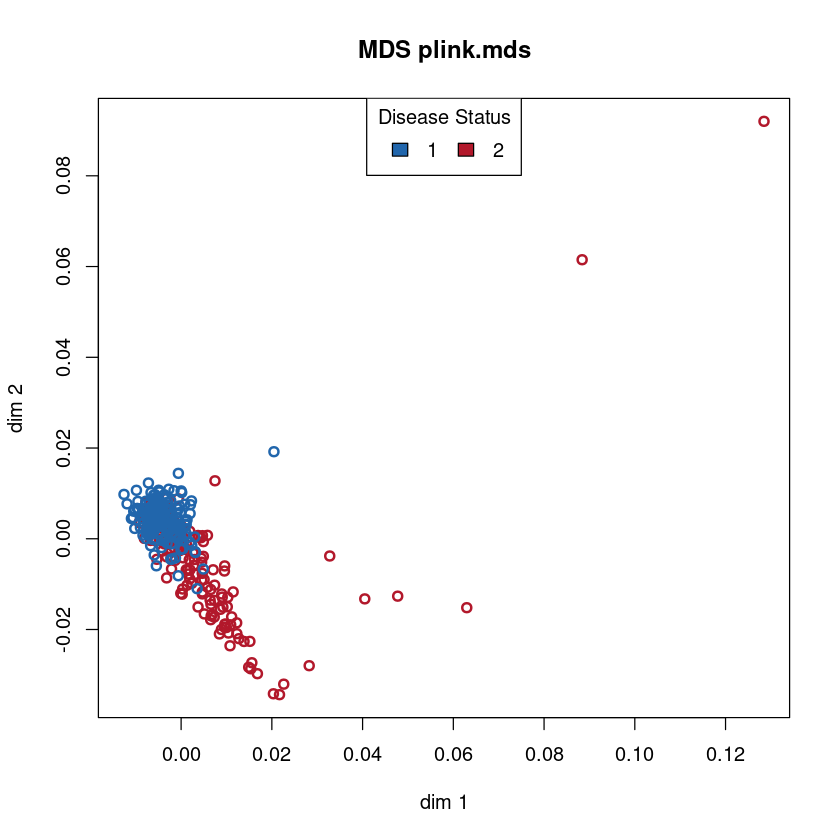

In [ ]:
# source R function for plotting
source("/course/novo23/scripts/newPlotPlink.R")

# plot the results (plink.mds is the output file from plink)
plotPlink("~/plink.mds",fam="~/data/gwa.fam")

It shows the first two dimensions and each individual is represented by a point, which is colored according to the individual's disease status (1=control, 2=case).

Clustering of cases and controls seperately is an indication of batch bias. 
- Do you see such clustering? 
- What else could explain such clustering?

Let's try to fix the issue by filtering individuals and SNPs. We can remove many of the error prone SNPs and individuals by removing

- SNPs that are not in HWE (Hardy weinberg Equilibrium) (option --hwe)

- the rare SNPs (difficult to genotype and very error prone) (option --maf)

- SNPs with lots of missing data (why?) (option --geno)

**Try to redo the above MDS analysis by adding the additional filters**

--hwe 0.0001 --maf 0.05 --geno 0.05

which remove sites not in HWE (p-value 0.0001), low minor allele frequency (<5%), high genotype missingness (>5%) (do it by changing the code above and running it again).


- Can you now see differences between cases and controls?

Let us try to rerun an association analysis with these additional filters (and a new output name so we won't overwrite our old results). 


In [ ]:
plink --bfile data/gwa --logistic --autosome --out assoc2 --hwe 0.0001 \
--maf 0.05 --mind 0.55 --geno 0.05 

PLINK v1.90b6 64-bit (26 May 2018)             www.cog-genomics.org/plink/1.9/
(C) 2005-2018 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to assoc2.log.
Options in effect:
  --autosome
  --bfile data/gwa
  --geno 0.05
  --hwe 0.0001
  --logistic
  --maf 0.05
  --mind 0.55
  --out assoc2

386831 MB RAM detected; reserving 193415 MB for main workspace.
488756 out of 499264 variants loaded from .bim file.
356 people (145 males, 211 females) loaded from .fam.
356 phenotype values loaded from .fam.
1 person removed due to missing genotype data (--mind).
ID written to assoc2.irem .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 355 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate in remaining samples i

Now try to plot the manhattan plot and the qqplot in R:

      CHR           SNP        BP TEST NMISS    OR         P
87321   4 SNP_A-1978655 119229342  ADD   338 3.913 5.114e-06


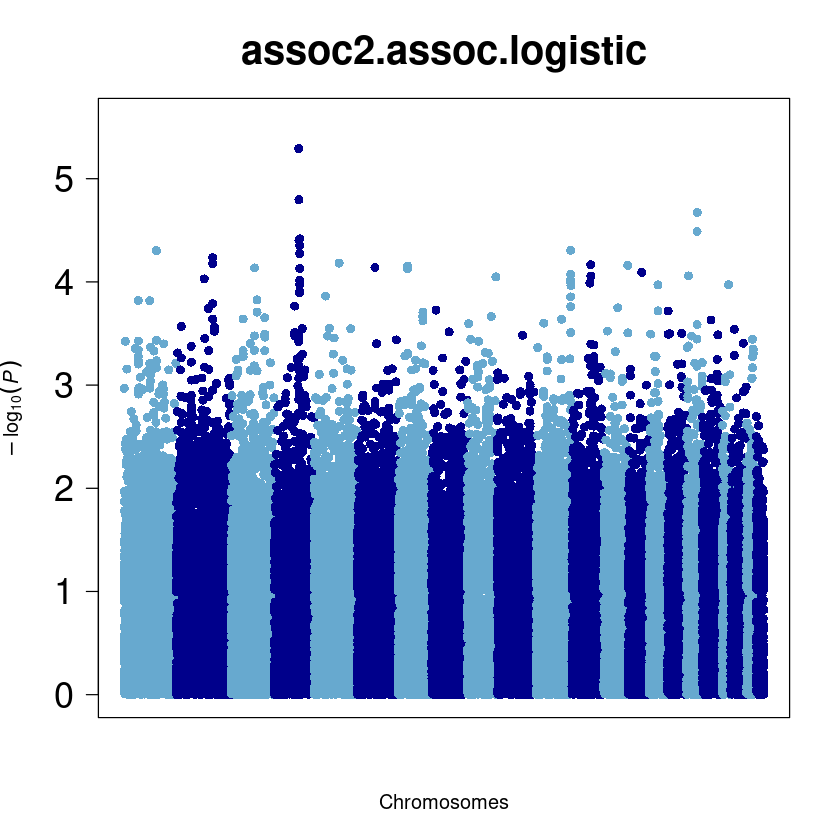

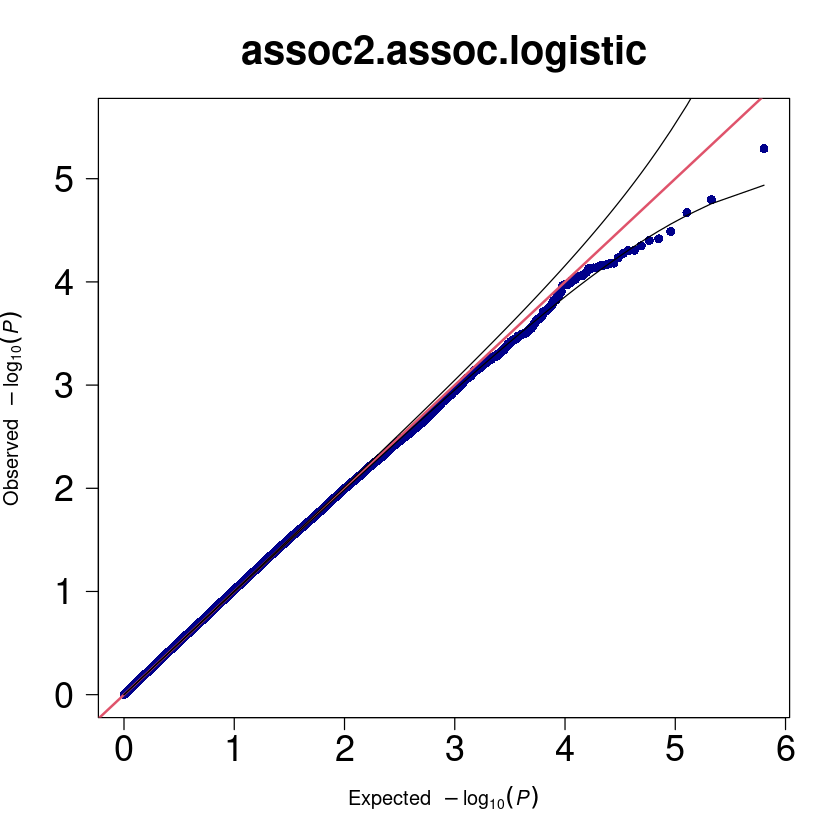

In [ ]:
# source R function for plotting
source("/course/novo23/scripts/newPlotPlink.R")

# plot the results (plink.genome is the output file from plink)
# print out the SNP with a p-value lower than 1e-5 (0.00001)
plotPlink("~/assoc2.assoc.logistic",pval=1e-5)


- How does the QQ plot look now - any signs of inflation?
- How many genome wide significant SNPs?
- Information about the most significant SNPs is printed above the manhatten plot. Identify the chromosome, physical position (BP), Odds-ratio and SNP name. 


Let's try to plot the region with the most significant SNP in a 1 Mb window around this SNP:

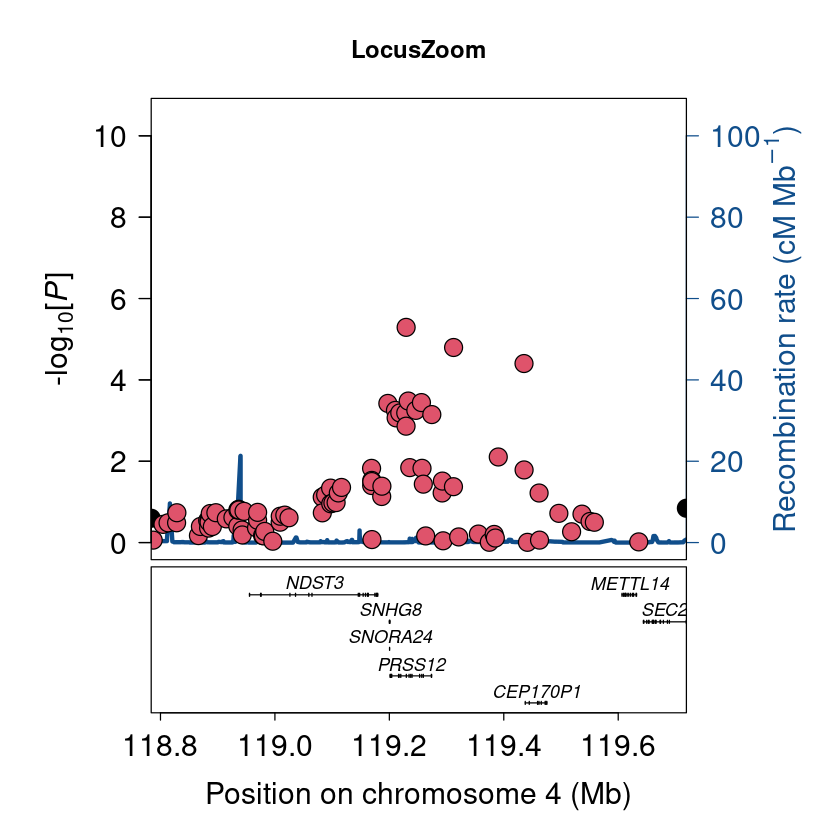

In [ ]:
# read in data in R
source("/course/novo23/scripts/newPlotPlink.R")

# read in data in R
d<-read.table("~/assoc2.assoc.logistic",head=T,as.is=T)

# select sites to plot, 0.5Mb on either side of SNP
region <- subset(d,CHR==4 & BP > 119229342-5e5 &  BP < 119229342+5e5)

#plot
locusZoomNoLD(region$P,chr=4,pos=region$BP,main="LocusZoom")

By itself the above signal is not genome wide significant. 
- what would be the next step

Assuming the association signal is due to a single causal SNP
- How many good candidates for causal SNPs are there?
- Which gene is the most likely gene that is affected by the variant?
- How can we determine, which variant (and which gene) is the causal ones?

# linear mixed model
Below you will apply a method called saige that implemented linear mixed model for GWAS

In [ ]:
cp -r /home/jupyter-bgi23_siyang/SAIGE .
dir1=`pwd`/SAIGE
cd ~/

mkdir -p SAIGE_output

cp: '/home/jupyter-bgi23_siyang/SAIGE' and './SAIGE' are the same file


# Step0 :Format the data as needed


In [ ]:
##Format the fam file
library(data.table)
data<-fread("data/gwa.fam",header=F)
data$V2<- data$V1
write.table (data, file ="data/gwa.fam", sep =" ", col.names =FALSE, quote =FALSE,row.names = FALSE,)


##Format the phenotype 
data1<-data[,c(1,6)]
colnames(data1)<-c("IID","y_binary")
data1$y_binary<-data1$y_binary-1
write.table (data1, file ="data/pheno.txt", sep =" ", col.names =TRUE, quote =FALSE,row.names = FALSE,)

# Step1: fitting the null logistic/linear mixed model
For binary traits, a null logistic mixed model will be fitted (–traitType=binary).

For quantitative traits, a null linear mixed model will be fitted (–traitType=quantitative) and needs to be inverse normalized (–invNormalize=TRUE)

In [ ]:
Rscript ${dir1}/extdata/step1_fitNULLGLMM.R  \
    --plinkFile=./data/gwa  \
    --phenoFile=./data/pheno.txt \
    --phenoCol=y_binary \
    --sampleIDColinphenoFile=IID \
    --traitType=binary        \
    --outputPrefix=./SAIGE_output/example_binary \
    --isCovariateOffset=FALSE \
    --nThreads=4    \
    --IsOverwriteVarianceRatioFile=TRUE

Loading required package: optparse
R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 22.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] optparse_1.7.3 SAIGE_1.3.1   

loaded via a namespace (and not attached):
[1] compiler_4.1.2     Matrix_1.6-1.1     Rcpp_1.0.11        getopt_1.20.4     
[5] grid_4.1.2         data.table_1.14.8  RcppParall

iter from getPCG1ofSigmaAndVector 2
iter from getPCG1ofSigmaAndVector 2
Updating variance component estimate took
   user  system elapsed 
 38.190   0.043   9.569 
[1] 0.0000000 0.6549845
tau:  1 0.5192277 
tau0:  1 0.1003284 

Iteration  2 1 0.5192277 :
tau0_v1:  1 0.5192277 
iter from getPCG1ofSigmaAndVector 4
iter from getPCG1ofSigmaAndVector 3
Tau:
[1] 1.0000000 0.5192277
Fixed-effect coefficients:
          [,1]
[1,] -0.249944
Updating fix effect coeffcieints took
   user  system elapsed 
  3.041   0.001   0.761 
iter from getPCG1ofSigmaAndVector 3
iter from getPCG1ofSigmaAndVector 3
iter from getPCG1ofSigmaAndVector 3
iter from getPCG1ofSigmaAndVector 3
iter from getPCG1ofSigmaAndVector 3
iter from getPCG1ofSigmaAndVector 3
iter from getPCG1ofSigmaAndVector 3
iter from getPCG1ofSigmaAndVector 3
iter from getPCG1ofSigmaAndVector 3
iter from getPCG1ofSigmaAndVector 3
iter from getPCG1ofSigmaAndVector 3
iter from getPCG1ofSigmaAndVector 3
iter from getPCG1ofSigmaAndVector 3
iter fro

Fixed-effect coefficients:
           [,1]
[1,] -0.2529736
Updating fix effect coeffcieints and model residuals took
   user  system elapsed 
  2.919   0.000   0.729 
leave chromosome  17  out
iter from getPCG1ofSigmaAndVector 4
iter from getPCG1ofSigmaAndVector 3
Tau:
[1] 1.0000000 0.5814314
Fixed-effect coefficients:
           [,1]
[1,] -0.2529639
Updating fix effect coeffcieints and model residuals took
   user  system elapsed 
  2.997   0.003   0.749 
leave chromosome  18  out
iter from getPCG1ofSigmaAndVector 4
iter from getPCG1ofSigmaAndVector 3
Tau:
[1] 1.0000000 0.5814314
Fixed-effect coefficients:
          [,1]
[1,] -0.252958
Updating fix effect coeffcieints and model residuals took
   user  system elapsed 
  2.981   0.001   0.748 
leave chromosome  19  out
iter from getPCG1ofSigmaAndVector 4
iter from getPCG1ofSigmaAndVector 3
Tau:
[1] 1.0000000 0.5814314
Fixed-effect coefficients:
           [,1]
[1,] -0.2529619
Updating fix effect coeffcieints and model residuals took
   

# 
See more parameter explanations: Rscript /home/jupyter-bgi23s22/SAIGE/extdata/step1_fitNULLGLMM.R --help

# Step 2: performing single-variant association tests
For binary traits, saddle point approximation is used to account for case-control imbalance.

For binary traits, use –is_output_moreDetails=TRUE to output heterozygous and homozygous counts as well as allele frequencies in cases and controls

–is_Firth_beta=TRUE and –pCutoffforFirth=0.05. The effect sizes of markers with p-value <= pCutoffforFirth will be estimated through the Firth’s Bias-Reduced Logistic Regression.

If LOCO=TRUE (by default), –chrom MUST be specified, so genotype/dosage file should only contain one chromosome

In [ ]:
Rscript ${dir1}/extdata/step2_SPAtests.R        \
    --bedFile=./data/gwa.bed       \
    --bimFile=./data/gwa.bim       \
    --famFile=./data/gwa.fam       \
    --AlleleOrder=alt-first \
    --SAIGEOutputFile=./SAIGE_output/SAIGE_GWAS.txt \
    --minMAF=0 \
    --minMAC=20 \
    --GMMATmodelFile=./SAIGE_output/example_binary.rda \
    --varianceRatioFile=./SAIGE_output/example_binary.varianceRatio.txt   \
    --is_output_moreDetails=TRUE    \
    --is_Firth_beta=TRUE    \
    --pCutoffforFirth=0.05  \
    --LOCO=FALSE    \
    --is_output_moreDetails=TRUE

Loading required package: RhpcBLASctl
R version 4.1.2 (2021-11-01)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 22.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] data.table_1.14.8   optparse_1.7.3      RhpcBLASctl_0.23-42
[4] SAIGE_1.3.1        

loaded via a namespace (and not attached):
[1] compiler_4.1.2     Matrix_1.6-1.1     Rcpp_1.0.11        getopt_1.20.4 

write to output
   user  system elapsed 
 28.080   4.105  13.446 
(2025-07-03 09:28:52) ---- Analyzing Chunk 14/63: chrom InitialChunk ---- 
3155 markers were tested.
Firth approx was applied to 145 markers. 145 sucessfully converged.
write to output
   user  system elapsed 
 28.398   4.108  13.767 
(2025-07-03 09:28:52) ---- Analyzing Chunk 15/63: chrom InitialChunk ---- 
Completed 10000/10000 markers in the chunk.
8025 markers were tested.
Firth approx was applied to 274 markers. 274 sucessfully converged.
write to output
   user  system elapsed 
 28.915   4.119  14.295 
(2025-07-03 09:28:53) ---- Analyzing Chunk 16/63: chrom InitialChunk ---- 
Completed 10000/10000 markers in the chunk.
7890 markers were tested.
Firth approx was applied to 357 markers. 357 sucessfully converged.
write to output
   user  system elapsed 
 29.447   4.135  14.843 
(2025-07-03 09:28:53) ---- Analyzing Chunk 17/63: chrom InitialChunk ---- 
Completed 10000/10000 markers in the chunk.
7976 markers were test

write to output
   user  system elapsed 
 43.042   4.484  28.789 
(2025-07-03 09:29:07) ---- Analyzing Chunk 45/63: chrom InitialChunk ---- 
Completed 10000/10000 markers in the chunk.
8010 markers were tested.
Firth approx was applied to 406 markers. 406 sucessfully converged.
write to output
   user  system elapsed 
 43.588   4.501  29.353 
(2025-07-03 09:29:08) ---- Analyzing Chunk 46/63: chrom InitialChunk ---- 
7430 markers were tested.
Firth approx was applied to 316 markers. 316 sucessfully converged.
write to output
   user  system elapsed 
 44.096   4.514  29.874 
(2025-07-03 09:29:08) ---- Analyzing Chunk 47/63: chrom InitialChunk ---- 
Completed 10000/10000 markers in the chunk.
8055 markers were tested.
Firth approx was applied to 365 markers. 365 sucessfully converged.
write to output
   user  system elapsed 
 44.643   4.523  30.429 
(2025-07-03 09:29:09) ---- Analyzing Chunk 48/63: chrom InitialChunk ---- 
4523 markers were tested.
Firth approx was applied to 234 markers.

# View the result of SAIGE-GWAS


In [ ]:
head ./SAIGE_output/SAIGE_GWAS.txt

CHR	POS	MarkerID	Allele1	Allele2	AC_Allele2	AF_Allele2	MissingRate	BETA	SE	Tstat	var	p.value	p.value.NA	Is.SPA	AF_case	AF_ctrl	N_case	N_ctrl	N_case_hom	N_case_het	N_ctrl_hom	N_ctrl_het
1	742429	SNP_A-1909444	2	1	135	0.189607	0.0168539	0.118501	0.21534	2.55548	21.5651	5.821156E-01	5.821156E-01	false	0.198718	0.1825	156	200	6	50	3	67
1	769185	SNP_A-4303947	1	2	115	0.161517	0.0196629	-0.0101026	0.224383	-0.200657	19.8619	9.640881E-01	9.640881E-01	false	0.160256	0.1625	156	200	5	40	3	59
1	775852	SNP_A-1886933	2	1	134	0.188202	0.0477528	-0.0207506	0.211542	-0.463702	22.3464	9.218589E-01	9.218589E-01	false	0.185897	0.19	156	200	7	44	4	68
1	782343	SNP_A-2236359	2	1	22	0.0308989	0.123596	-0.740984	0.48122	-3.19979	4.3183	1.236086E-01	1.236086E-01	false	0.0192308	0.04	156	200	0	6	0	16
1	993492	SNP_A-2116190	1	2	223	0.313202	0.0168539	-0.0447123	0.171756	-1.51567	33.8984	7.946129E-01	7.946129E-01	false	0.307692	0.3175	156	200	11	74	28	71
1	1087198	SNP_A-4291020	1	2	52	0.0730337	0.0505618	-0.2394